### Yao N'guessan Jean Bosco

### ALLLER SUR JUMIA SCRAPER  SUR TOUT LES PRODUITS IPHONE  

#### Utilisation de SELENIUM 

L'objectif de ce exercice est de collecter les produits disponibles sur JUMIA et de réaliser une analyse comparative des prix de ces produits avec ceux d'autres sites e-commerce

In [114]:
import os
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.by import By 

In [115]:
driver=webdriver.Chrome()
url = "https://www.jumia.ci/"
driver.get(url)
# En fonction de notre connexion et des performance de notre machine il faudra attendre
# que la page charge avant de passer à la suite
time.sleep(10)

In [116]:
# Gerer les pop-up et les cookies automatiquement 
button_pop=driver.find_element(By.CLASS_NAME,"cls")
button_pop.click()

#Cookies
button_cookies = driver.find_element(By.CSS_SELECTOR, ".btn._prim.-df.-mla")
button_cookies.click()

In [117]:
from selenium.webdriver.common.keys import Keys

# On recupere la bar de recherche, on la remplit avec "iphone" puis on appuie "Entrez"
# driver.refresh()
# search_bar = driver.find_element_by_name("search_query")
search_bar = driver.find_element(By.ID, "fi-q")
search_bar.clear()
time.sleep(5)
search_bar.send_keys("Apple iphone")

time.sleep(5)
search_bar.send_keys(Keys.ENTER)

In [118]:
# Chargement du code source de la page recherchée
page = driver.page_source
soup = BeautifulSoup(page)

In [119]:
"""
url1='https://www.jumia.ci/catalog/?q=iphone' # votre lien ici
result = requests.get(url1)
src = result.content
soup = BeautifulSoup(src, 'html.parser')
print(soup.prettify()) """

"\nurl1='https://www.jumia.ci/catalog/?q=iphone' # votre lien ici\nresult = requests.get(url1)\nsrc = result.content\nsoup = BeautifulSoup(src, 'html.parser')\nprint(soup.prettify()) "

In [120]:
article_elements = soup.find_all("article", class_="prd _fb col c-prd")
for article in article_elements:
    name = article.find("h3", class_="name").text.strip()
    price = article.find("div", class_="prc").text.strip()
    rating = article.find("div", class_="stars _s").text.split()[0] if article.find("div", class_="stars _s") else "Note non disponible"
    link=url + article.a.next_sibling["href"]
    
    print(f"Nom de l'article: {name}")
    print(f"Prix de l'article: {price}")
    print(f"Nombre d'étoiles: {rating}")
    print(f"Lien vers la page dédiée: {link}")
    print()

Nom de l'article: Apple IPhone 13 - 128Go - Noire
Prix de l'article: 419,000 FCFA
Nombre d'étoiles: 4.5
Lien vers la page dédiée: https://www.jumia.ci//apple-iphone-13-128go-noire-19732039.html

Nom de l'article: Apple IPHONE 15-128Go Noir
Prix de l'article: 589,000 FCFA
Nombre d'étoiles: Note non disponible
Lien vers la page dédiée: https://www.jumia.ci//apple-iphone-15-128go-noir-27877429.html

Nom de l'article: Apple IPhone 13 ProMax-256Go Graphite
Prix de l'article: 790,000 FCFA
Nombre d'étoiles: Note non disponible
Lien vers la page dédiée: https://www.jumia.ci//apple-iphone-13-promax-256go-graphite-19741037.html

Nom de l'article: Apple IPhone 15Pro-256Go Titane Blanc
Prix de l'article: 790,000 FCFA
Nombre d'étoiles: Note non disponible
Lien vers la page dédiée: https://www.jumia.ci//apple-iphone-15pro-256go-titane-blanc-27919774.html

Nom de l'article: Apple IPHONE 15 PRO - 6.1" Super Retina XDR OLED – 256GB - 5G – 3349 mAh - noir  - avec chargeur original - Garantie un an
Prix 

In [121]:
a=driver.find_elements(By.CSS_SELECTOR, ".prd._fb.col.c-prd")
len(a)

40

In [122]:
import pandas as pd
data = {
    "Nom": [],
    "Prix": [],
    "Boutique":[],
    "Nombre d'étoiles": [],
    "Lien vers la page dédiée à l'article": []
}

article_elements = soup.find_all("article", class_="prd _fb col c-prd")
for article in article_elements:
    
    
    boutik= article.find("div",class_="bdg _mall _xs").text.strip() if article.find("div",class_="bdg _mall _xs") else "Boutique non officielle"
    name = article.find("h3", class_="name").text.strip()
    price = article.find("div", class_="prc").text.strip()
    rating = article.find("div", class_="stars _s").text.split()[0] if article.find("div", class_="stars _s") else "Note non disponible"
    link=url + article.a.next_sibling["href"]
    
    data["Nom"].append(name)
    data["Prix"].append(price)
    data["Boutique"].append(boutik)
    data["Nombre d'étoiles"].append(rating)
    data["Lien vers la page dédiée à l'article"].append(link)

# Création d'un DataFrame
df = pd.DataFrame(data)

# Affichage du DataFrame
df

,Nom,Prix,Boutique,Nombre d'étoiles,Lien vers la page dédiée à l'article
0,Apple IPhone 13 - 128Go - Noire,"419,000 FCFA",Boutique Officielle,4.5,https://www.jumia.ci//apple-iphone-13-128go-no...
1,Apple IPHONE 15-128Go Noir,"589,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-128go-no...
2,Apple IPhone 13 ProMax-256Go Graphite,"790,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-13-promax-2...
3,Apple IPhone 15Pro-256Go Titane Blanc,"790,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
4,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...","713,500 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...
5,Apple IPHONE 15Pro-256Go Titane Naturel,"795,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
6,"Apple IPad Air 10.9"" WI-FI + Cellular","1,000,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-ipad-air-10.9-wi-f...
7,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...","649,800 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...
8,Apple IPHONE 15Plus-256Go Noir,"729,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15plus-256g...
9,Apple IPhone 15Pro-256Go Titane Bleu,"795,000 FCFA",Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...


In [101]:
# Nettoyage de la colonne
df["Prix"] = df["Prix"].str.replace("FCFA", "").str.replace(",", "").str.strip()
df

,Nom,Prix,Boutique,Nombre d'étoiles,Lien vers la page dédiée à l'article
0,Protection écran de Confidentialité pour Apple...,4720,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-protection-ecran...
1,Chargeur Sans Fil 2 En 1 Seneo Pour Apple Watc...,17400,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-chargeur-sans-fi...
2,Coque Magnétique Iphone 12 Pro Max - Noire,13990,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-coque-magnetique...
3,Coque Transparente Et Antichoc Compatible IPHO...,4900,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-coque-transparen...
4,COQUE COMPATIBLE IPHONE 12 PRO MAX NOIR,7000,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-coque-compatible...
5,Chargeur Sans Fil 2 En 1 Seneo Pour Apple Watc...,17900,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-chargeur-sans-fi...
6,COQUE AMURE COMPATIBLE IPHONE 12 AVEC ANNEAU-...,7500,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-coque-amure-comp...
7,Coque Magnétique Iphone 12 - Noire,13990,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-coque-magnetique...
8,Chargeur Sans Fil 2 En 1 Seneo Pour Apple Watc...,18400,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-chargeur-sans-fi...
9,Chargeur Sans Fil 2 En 1 Seneo Pour Apple Watc...,17700,Boutique non officielle,Note non disponible,https://www.jumia.ci//generic-chargeur-sans-fi...


In [123]:
soup.prettify

<bound method Tag.prettify of <html dir="ltr" lang="fr"><head><meta charset="utf-8"/><title>Tous les produits | Jumia Côte d'ivoire</title><meta content="product" property="og:type"/><meta content="Jumia Côte d’Ivoire" property="og:site_name"/><meta content="Tous les produits | Jumia Côte d'ivoire" property="og:title"/><meta content="Découvrez une large sélection de produits de nos top catalogues Smartphones, High Tech, Mode, Épicerie - Commandez en ligne  et  profitez de nos réductions ❤ Jumia change la vie et la rend plus simple ➤ Paiement sécurisé &amp; expédition rapide." property="og:description"/><meta content="/catalog/" property="og:url"/><meta content="https://ci.jumia.is/cms/Homepage/jumialogonew.png" property="og:image"/><meta content="fr_CI" property="og:locale"/><meta content="Tous les produits | Jumia Côte d'ivoire" name="title"/><meta content="noindex,follow" name="robots"/><meta content="Découvrez une large sélection de produits de nos top catalogues Smartphones, High T

In [124]:
from selenium.common.exceptions import NoSuchElementException

# Dictionnaire pour stocker les données
data = {
    "Nom": [],
    "Prix": [],
    "Boutique": [],
    "Nombre d'étoiles": [],
    "Lien vers la page dédiée à l'article": []
}



while True:
    # Récupérer la source de la page actuelle
    page = driver.page_source
    soup = BeautifulSoup(page, "html.parser")
    
    # Extraction des données
    article_elements = soup.find_all("article", class_="prd _fb col c-prd")
    for article in article_elements:
        boutik = article.find("div", class_="bdg _mall _xs").text.strip() if article.find("div", class_="bdg _mall _xs") else "Boutique non officielle"
        name = article.find("h3", class_="name").text.strip()
        price = article.find("div", class_="prc").text.strip()
        rating = article.find("div", class_="stars _s").text.split()[0] if article.find("div", class_="stars _s") else "Note non disponible"
        link=url + article.a.next_sibling["href"]

        data["Nom"].append(name)
        data["Prix"].append(price)
        data["Boutique"].append(boutik)
        data["Nombre d'étoiles"].append(rating)
        data["Lien vers la page dédiée à l'article"].append(link)
    
    # Vérification de la présence du bouton "suivant"
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "a.pg[aria-label='Page suivante']")
        next_page_url = next_button.get_attribute("href")
        driver.get(next_page_url)  # Aller à la page suivante
        time.sleep(3)  # Attendre que la page suivante se charge
    except NoSuchElementException:
        print("Fin de la pagination.")
        break

# Création d'un DataFrame
df1 = pd.DataFrame(data)
df1["Nom"] = df1["Nom"].str.replace("FCFA", "").str.replace(",", "").str.strip().astype(int)
df1= df1[df1["Nom"].str.lower().str.startswith("apple iphone")]
# Affichage des données collectées
print(df1)


Fin de la pagination.


ValueError: invalid literal for int() with base 10: 'Apple IPhone 13 - 128Go - Noire'

In [96]:
df1.head(60)

,Nom de l'article,Prix de l'article,Boutique,Nombre d'étoiles,Lien vers la page dédiée à l'article
0,Apple IPhone 13 - 128Go - Noire,419000,Boutique Officielle,4.5,https://www.jumia.ci//apple-iphone-13-128go-no...
1,Apple IPHONE 15-128Go Noir,589000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-128go-no...
2,Apple IPhone 13 ProMax-256Go Graphite,790000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-13-promax-2...
3,Apple IPhone 15Pro-256Go Titane Blanc,809000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
4,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...",713500,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...
5,Apple IPHONE 15Pro-256Go Titane Naturel,795000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
7,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...",649800,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...
8,Apple IPHONE 15Plus-256Go Noir,729000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15plus-256g...
9,Apple IPhone 15Pro-256Go Titane Bleu,795000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
10,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...",713500,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...


In [97]:
df1.to_csv("jumia.csv",sep=",")

In [98]:
iphone_jumia = df1[df1["Nom de l'article"].str.lower().str.startswith("apple iphone")]
iphone_jumia

,Nom de l'article,Prix de l'article,Boutique,Nombre d'étoiles,Lien vers la page dédiée à l'article
0,Apple IPhone 13 - 128Go - Noire,419000,Boutique Officielle,4.5,https://www.jumia.ci//apple-iphone-13-128go-no...
1,Apple IPHONE 15-128Go Noir,589000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-128go-no...
2,Apple IPhone 13 ProMax-256Go Graphite,790000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-13-promax-2...
3,Apple IPhone 15Pro-256Go Titane Blanc,809000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
4,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...",713500,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...
5,Apple IPHONE 15Pro-256Go Titane Naturel,795000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
7,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...",649800,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...
8,Apple IPHONE 15Plus-256Go Noir,729000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15plus-256g...
9,Apple IPhone 15Pro-256Go Titane Bleu,795000,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15pro-256go...
10,"Apple IPHONE 15 PRO - 6.1"" Super Retina XDR OL...",713500,Boutique Officielle,Note non disponible,https://www.jumia.ci//apple-iphone-15-pro-6.1-...


On va aller  scraper le site de ivoire mobile avant de faire la comparaisons

In [43]:
driver=webdriver.Chrome()
url = "https://www.ivoiremobiles.net/"
driver.get(url)
# En fonction de notre connexion et des performance de notre machine il faudra attendre
# que la page charge avant de passer à la suite
time.sleep(10)

In [44]:
# On recupere la bar de recherche, on la remplit avec "iphone" puis on appuie "Entrez"
# driver.refresh()
# search_bar = driver.find_element_by_name("search_query")
search_bar = driver.find_element(By.CSS_SELECTOR, ".search_query.form-control.ui-autocomplete-input")
search_bar.clear()
time.sleep(5)
search_bar.send_keys("Apple iphone")

time.sleep(5)
search_bar.send_keys(Keys.ENTER)

In [45]:
# Chargement du code source de la page recherchée
page = driver.page_source
bs = BeautifulSoup(page)

In [46]:
"""
url1='https://www.ivoiremobiles.net/' # votre lien ici
result = requests.get(url1)
src = result.content
soup = BeautifulSoup(src, 'html.parser')
print(soup.prettify()) """

"\nurl1='https://www.ivoiremobiles.net/' # votre lien ici\nresult = requests.get(url1)\nsrc = result.content\nsoup = BeautifulSoup(src, 'html.parser')\nprint(soup.prettify()) "

In [47]:
bs.prettify()

'<html lang="fr">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Résultats de recherche pour "Apple iphone"\n  </title>\n  <meta content="PrestaShop" name="generator"/>\n  <meta content="index,follow" name="robots"/>\n  <meta content="width=device-width, minimum-scale=0.25, maximum-scale=1.6, initial-scale=1.0" name="viewport"/>\n  <meta content="yes" name="apple-mobile-web-app-capable"/>\n  <link href="/img/favicon.ico?1655247122" rel="icon" type="image/vnd.microsoft.icon"/>\n  <link href="/img/favicon.ico?1655247122" rel="shortcut icon" type="image/x-icon"/>\n  <link href="https://www.ivoiremobiles.net/themes/default-bootstrap/cache/v_72_4675ccdb673d8a3d1c88ec31261ede8c_all.css" media="all" rel="stylesheet" type="text/css"/>\n  <meta content="" property="retailer_item_id"/>\n  <meta content="" property="og:price"/>\n  <meta content="XOF" property="og:priceCurrency"/>\n  <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202411140101/reactive_library_fy2

In [48]:
produits = driver.find_elements(By.CLASS_NAME,"product-image-container")
produits

[<selenium.webdriver.remote.webelement.WebElement (session="d002611f1aa141e84030d58a528c76fb", element="f.D74EBA15A1FDBB4DE2CC98DABC7AD70E.d.A5159AB2B9EB54D0197CC90BF97AD6DD.e.120")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d002611f1aa141e84030d58a528c76fb", element="f.D74EBA15A1FDBB4DE2CC98DABC7AD70E.d.A5159AB2B9EB54D0197CC90BF97AD6DD.e.109")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d002611f1aa141e84030d58a528c76fb", element="f.D74EBA15A1FDBB4DE2CC98DABC7AD70E.d.A5159AB2B9EB54D0197CC90BF97AD6DD.e.112")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d002611f1aa141e84030d58a528c76fb", element="f.D74EBA15A1FDBB4DE2CC98DABC7AD70E.d.A5159AB2B9EB54D0197CC90BF97AD6DD.e.115")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d002611f1aa141e84030d58a528c76fb", element="f.D74EBA15A1FDBB4DE2CC98DABC7AD70E.d.A5159AB2B9EB54D0197CC90BF97AD6DD.e.121")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d002611f1aa141e84030

In [57]:
element=bs.find_all("img", class_="replace-2x img-responsive")
element

[<img alt="Samsung Galaxy A25 256 Go" class="replace-2x img-responsive" src="https://www.ivoiremobiles.net/27955-small_default/samsung-galaxy-a25-256-go.jpg"/>,
 <img alt="Samsung Galaxy A25 128 Go" class="replace-2x img-responsive" src="https://www.ivoiremobiles.net/27944-small_default/samsung-galaxy-a25-128-go.jpg"/>,
 <img alt="Samsung Galaxy A55 256 Go" class="replace-2x img-responsive" src="https://www.ivoiremobiles.net/27806-small_default/samsung-galaxy-a55-256-go.jpg"/>,
 <img alt="Samsung Galaxy A55 128 Go" class="replace-2x img-responsive" src="https://www.ivoiremobiles.net/27769-small_default/samsung-galaxy-a55-128-go.jpg"/>,
 <img alt="Samsung Galaxy A35 256 Go" class="replace-2x img-responsive" src="https://www.ivoiremobiles.net/27732-small_default/samsung-galaxy-a35-256-go.jpg"/>,
 <img alt="Samsung Galaxy A35 128 Go" class="replace-2x img-responsive" src="https://www.ivoiremobiles.net/27695-small_default/samsung-galaxy-a35-128-go.jpg"/>,
 <img alt="Apple iPad Air 13 (2024

In [62]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time

# Configurer le driver Selenium
driver = webdriver.Chrome()  # Remplacez par le bon driver (ex: `webdriver.Edge()`, etc.)
driver.get("https://www.ivoiremobiles.net/")  # Remplacez par l'URL correcte

# Étape 1 : Remplir la barre de recherche avec "Apple iPhone"
time.sleep(5)  # Assurez-vous que la page a bien chargé
search_bar = driver.find_element(By.CSS_SELECTOR, ".search_query.form-control.ui-autocomplete-input")
search_bar.clear()
time.sleep(1)  # Pause légère pour éviter les erreurs de timing
search_bar.send_keys("Apple iPhone")
time.sleep(2)  # Pause avant d'envoyer ENTER
search_bar.send_keys(Keys.ENTER)

# Étape 2 : Récupérer la page de résultats
time.sleep(5)  # Attendre que les résultats chargent
page = driver.page_source  # Extraire le contenu HTML de la page actuelle
soup = BeautifulSoup(page, "html.parser")

# Étape 3 : Scraper les informations des produits iPhone
iphones = []
for product in soup.find_all("li", class_="ajax_block_product"):
    # Extraire le nom du produit
    img_tag = product.find("img", class_="replace-2x img-responsive")
    name = img_tag.get("title") if img_tag else "N/A"
    
    # Vérifier si le produit est un iPhone
    if "iphone" not in name.lower():
        continue
    
    # Extraire le lien de l'image
    image_link = img_tag.get("src") if img_tag else "N/A"
    
    # Extraire le prix
    price_tag = product.find("span", class_="price product-price")
    price = price_tag.text.strip() if price_tag else "N/A"
    
    # Ajouter les informations dans une liste
    iphones.append({"Nom": name, "Lien de l'image": image_link, "Prix": price})

# Étape 4 : Convertir les données en DataFrame
df = pd.DataFrame(iphones)

# Nettoyer les prix (enlever "FCFA" et convertir en numérique)
df["Prix"] = df["Prix"].str.replace("FCFA", "").str.replace(" ", "").str.strip()
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")  # Gestion des erreurs éventuelles

# Étape 5 : Sauvegarder les données dans un fichier CSV
df.to_csv("iphones_ivoiremobile.csv", index=False)

# Afficher les données
print(df)

# Fermer le navigateur
driver.quit()


                               Nom  \
0              Apple iPhone 13 Pro   
1   Apple iPhone 13 Pro Max 128 Go   
2   Apple iPhone 13 Pro Max 256 Go   
3              Apple iPhone 13 Pro   
4              Apple iPhone 13 Pro   
..                             ...   
91           Apple iPhone 6s 16 Go   
92           Apple iPhone 6s 32 Go   
93           Apple iPhone 5S 16 Go   
94                 Apple iPhone 5c   
95                 Apple iPhone 5c   

                                      Lien de l'image    Prix  
0   https://www.ivoiremobiles.net/20424-home_defau...  709900  
1   https://www.ivoiremobiles.net/20425-home_defau...  779900  
2   https://www.ivoiremobiles.net/17900-home_defau...  859900  
3   https://www.ivoiremobiles.net/20913-home_defau...  739900  
4   https://www.ivoiremobiles.net/20928-home_defau...  839900  
..                                                ...     ...  
91  https://www.ivoiremobiles.net/14765-home_defau...  159900  
92  https://www.ivoiremobiles.n

In [64]:
data= pd.read_csv("iphones_ivoiremobile.csv")
data.head(60)

,Nom,Lien de l'image,Prix
0,Apple iPhone 13 Pro,https://www.ivoiremobiles.net/20424-home_defau...,709900
1,Apple iPhone 13 Pro Max 128 Go,https://www.ivoiremobiles.net/20425-home_defau...,779900
2,Apple iPhone 13 Pro Max 256 Go,https://www.ivoiremobiles.net/17900-home_defau...,859900
3,Apple iPhone 13 Pro,https://www.ivoiremobiles.net/20913-home_defau...,739900
4,Apple iPhone 13 Pro,https://www.ivoiremobiles.net/20928-home_defau...,839900
5,Apple iPhone 13 Pro Max 256 Go,https://www.ivoiremobiles.net/23747-home_defau...,919900
6,Apple iPhone 15 Pro 128 Go,https://www.ivoiremobiles.net/25766-home_defau...,619900
7,Apple iPhone 15 Pro Max 256 Go,https://www.ivoiremobiles.net/25802-home_defau...,759900
8,Apple iPhone 15 Pro Max 256 Go,https://www.ivoiremobiles.net/25803-home_defau...,859900
9,Apple iPhone 15 Pro Max 256 Go,https://www.ivoiremobiles.net/25821-home_defau...,1029900


In [71]:
iphone = df[df["Nom"].str.contains("iPhone", case=False, na=False)]
iphone

,Nom,Lien de l'image,Prix
0,Apple iPhone 13 Pro,https://www.ivoiremobiles.net/20424-home_defau...,709900
1,Apple iPhone 13 Pro Max 128 Go,https://www.ivoiremobiles.net/20425-home_defau...,779900
2,Apple iPhone 13 Pro Max 256 Go,https://www.ivoiremobiles.net/17900-home_defau...,859900
3,Apple iPhone 13 Pro,https://www.ivoiremobiles.net/20913-home_defau...,739900
4,Apple iPhone 13 Pro,https://www.ivoiremobiles.net/20928-home_defau...,839900
...,...,...,...
91,Apple iPhone 6s 16 Go,https://www.ivoiremobiles.net/14765-home_defau...,159900
92,Apple iPhone 6s 32 Go,https://www.ivoiremobiles.net/14761-home_defau...,109900
93,Apple iPhone 5S 16 Go,https://www.ivoiremobiles.net/18524-home_defau...,64900
94,Apple iPhone 5c,https://www.ivoiremobiles.net/12903-home_defau...,64900


In [68]:
!pip install python-Levenshtein

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
!pip install fuzzywuzzy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
import pandas as pd
from fuzzywuzzy import process
import matplotlib.pyplot as plt


In [148]:
# Charger les données
ivoire_data = pd.read_csv("iphones_ivoiremobile.csv")
jumia_data = pd.read_csv("jumia.csv")

In [150]:
ivoire_data["Prix"].min()

64900

In [151]:
jumia_data["Prix de l\'article"].min()

419000

In [152]:
# Renommer les colonnes pour simplifier le traitement
ivoire_data.rename(columns={"Nom": "Nom"}, inplace=True)  # Pas nécessaire ici si déjà "Nom"
jumia_data.rename(columns={"Nom de l'article": "Nom"}, inplace=True)


In [160]:
ivoire_data.shape

(41, 3)

In [156]:
# Harmonisation des noms (mettre tout en minuscules pour uniformité)
ivoire_data["Nom"] = ivoire_data["Nom"].str.lower()
jumia_data["Nom"] = jumia_data["Nom"].str.lower()

In [157]:
# Supprimer les doublons dans chaque dataset
ivoire_data = ivoire_data.drop_duplicates(subset="Nom", keep="first")
jumia_data = jumia_data.drop_duplicates(subset="Nom", keep="first")


In [161]:
ivoire_data.shape

(41, 3)

In [162]:
# Fonction de correspondance floue pour aligner les noms
def match_products(ivoire_names, jumia_data, threshold=90):
    matched = []
    for ivoire_name in ivoire_names:
        match = process.extractOne(ivoire_name, jumia_data["Nom"], score_cutoff=threshold)
        if match:
            matched.append((ivoire_name, match[0], match[1]))  # (nom_ivoire, nom_jumia, score)
    return matched

In [132]:
# Trouver les correspondances entre les deux datasets
matched_products = match_products(ivoire_data["Nom"], jumia_data)


In [133]:
# Créer un DataFrame des correspondances
matched_df = pd.DataFrame(matched_products, columns=["Nom Ivoire", "Nom Jumia", "Score"])


In [136]:
# Joindre les prix des deux datasets sur les correspondances
comparison = pd.merge(
    matched_df,
    ivoire_data[["Nom", "Prix"]].rename(columns={"Nom": "Nom Ivoire", "Prix": "Prix Ivoire"}),
    on="Nom Ivoire",
    how="left"
)
comparison = pd.merge(
    comparison,
    jumia_data[["Nom", "Prix de l'article"]].rename(columns={"Nom": "Nom Jumia", "Prix de l'article": "Prix Jumia"}),
    on="Nom Jumia",
    how="left"
)

In [137]:
# Calculer la différence de prix
comparison["Différence de Prix"] = comparison["Prix Ivoire"] - comparison["Prix Jumia"]


In [138]:
# Identifier les produits absents sur l'un ou l'autre des sites
absent_in_jumia = ivoire_data[~ivoire_data["Nom"].isin(matched_df["Nom Ivoire"])]
absent_in_ivoire = jumia_data[~jumia_data["Nom"].isin(matched_df["Nom Jumia"])]


In [140]:
 #Sauvegarder les résultats
comparison.to_csv("comparaison_prix_iphones.csv", index=False)
absent_in_jumia.to_csv("absent_dans_jumia.csv", index=False)
absent_in_ivoire.to_csv("absent_dans_ivoire.csv", index=False)


In [141]:
# Résumé des divergences
print("Résumé des différences de prix :")
print(comparison.describe())

Résumé des différences de prix :
           Score    Prix Ivoire     Prix Jumia  Différence de Prix
count   6.000000       6.000000       6.000000             6.00000
mean   90.166667  257400.000000  711500.000000       -454100.00000
std     0.408248  247057.685572  161658.590864        316622.80398
min    90.000000   79900.000000  419000.000000       -790100.00000
25%    90.000000  106150.000000  690000.000000       -651350.00000
50%    90.000000  137400.000000  740000.000000       -575100.00000
75%    90.000000  322400.000000  790000.000000       -195100.00000
max    91.000000  709900.000000  890000.000000        -39100.00000


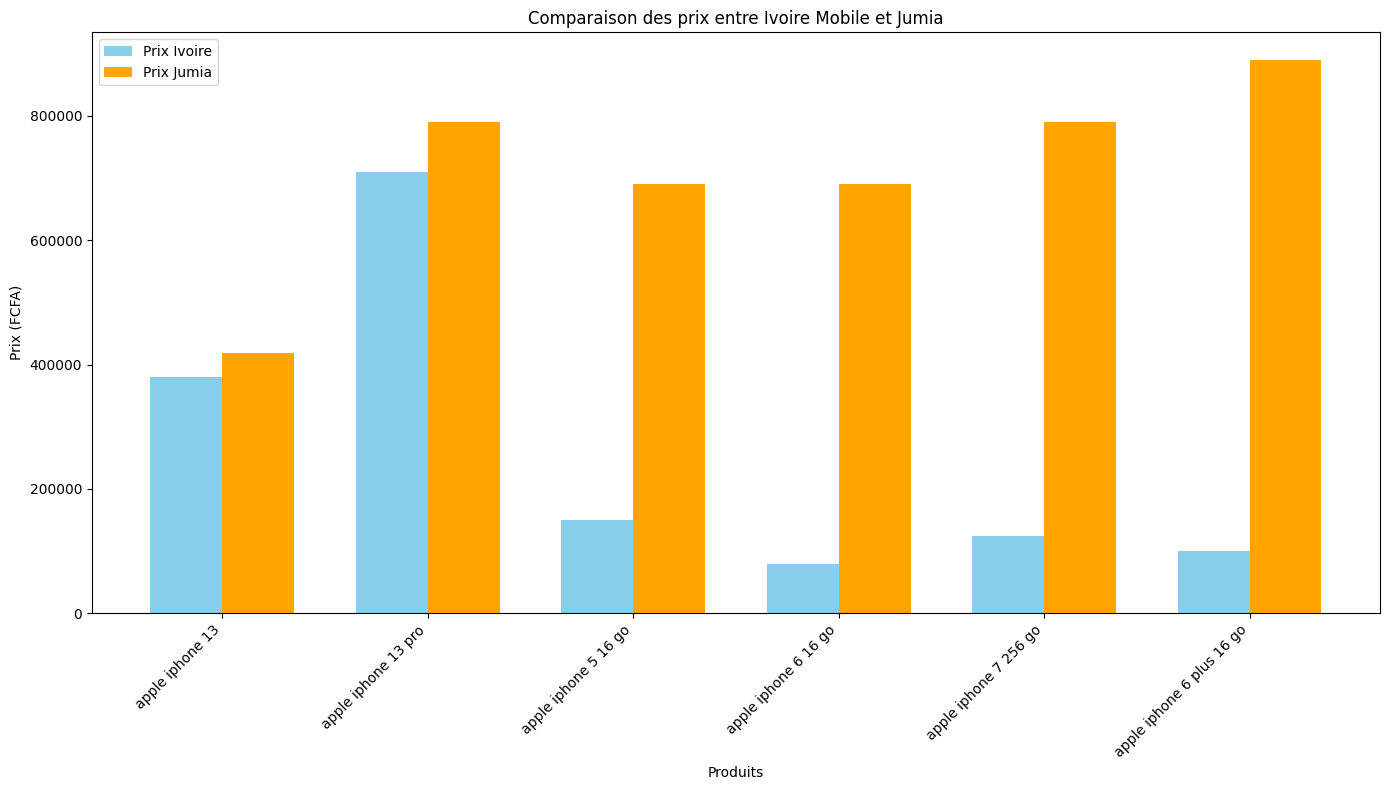

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Trier les données par différence de prix pour une meilleure lisibilité
comparison_sorted = comparison.sort_values(by="Différence de Prix", ascending=False)

# Limiter à un nombre raisonnable de produits pour éviter un graphique surchargé
n_products = 10 # Par exemple, afficher les 20 premiers produits
comparison_sorted = comparison_sorted.head(n_products)

# Définir la largeur des barres
bar_width = 0.35
index = np.arange(len(comparison_sorted))

# Création du graphique
plt.figure(figsize=(14, 8))

# Barres pour les prix Ivoire
plt.bar(index, comparison_sorted["Prix Ivoire"], bar_width, label="Prix Ivoire", color='skyblue')

# Barres pour les prix Jumia
plt.bar(index + bar_width, comparison_sorted["Prix Jumia"], bar_width, label="Prix Jumia", color='orange')

# Ajouter les noms des produits comme étiquettes sur l'axe des x
plt.xticks(index + bar_width / 2, comparison_sorted["Nom Ivoire"], rotation=45, ha="right")

# Ajouter un titre et des étiquettes aux axes
plt.title("Comparaison des prix entre Ivoire Mobile et Jumia")
plt.xlabel("Produits")
plt.ylabel("Prix (FCFA)")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


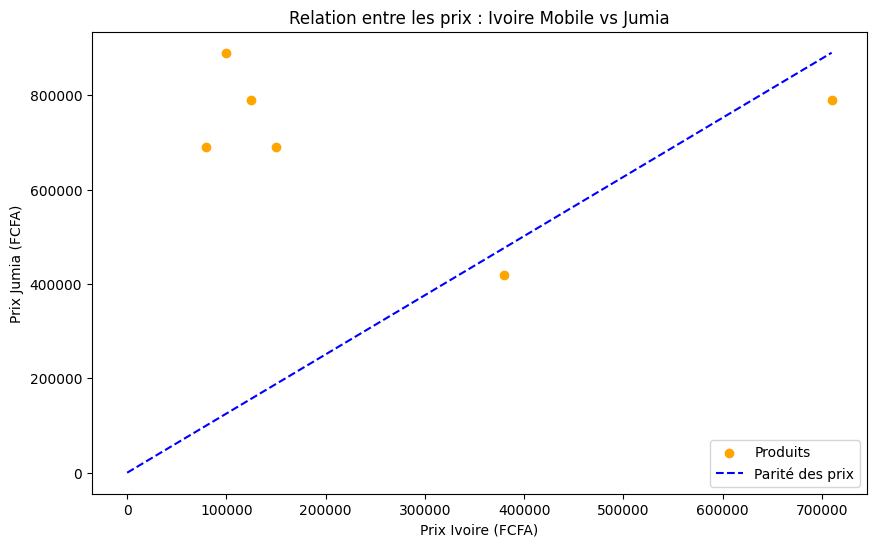

In [167]:
### Diagramme de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(comparison_sorted["Prix Ivoire"], comparison_sorted["Prix Jumia"], color="orange", label="Produits")
plt.plot([0, max(comparison_sorted["Prix Ivoire"])], [0, max(comparison_sorted["Prix Jumia"])], color="blue", linestyle="--", label="Parité des prix")
plt.title("Relation entre les prix : Ivoire Mobile vs Jumia")
plt.xlabel("Prix Ivoire (FCFA)")
plt.ylabel("Prix Jumia (FCFA)")
plt.legend()
plt.show()



C:\Users\Yao Simlin\AppData\Local\Temp\ipykernel_14368\1808529552.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Site", y="Prix", data=comparison_melted, palette="Set2")


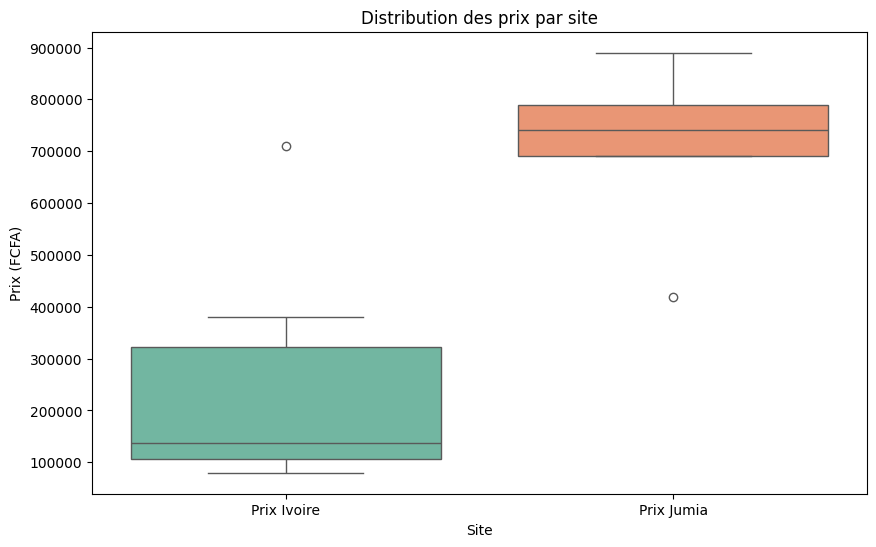

In [170]:
### Boite à moustache
import seaborn as sns
comparison_melted = comparison_sorted.melt(id_vars="Nom Ivoire", value_vars=["Prix Ivoire", "Prix Jumia"],
                                           var_name="Site", value_name="Prix")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Site", y="Prix", data=comparison_melted, palette="Set2")
plt.title("Distribution des prix par site")
plt.ylabel("Prix (FCFA)")
plt.show();


              Nom Ivoire                              Nom Jumia  Score  \
2        apple iphone 13        apple iphone 13 - 128go - noire     90   
0    apple iphone 13 pro  apple iphone 13 promax-256go graphite     90   
3   apple iphone 5 16 go            apple iphone 16 128 go noir     90   
4   apple iphone 6 16 go            apple iphone 16 128 go noir     90   
1  apple iphone 7 256 go          apple iphone 16 - 256 go rose     90   

   Prix Ivoire  Prix Jumia  Différence de Prix  
2       379900      419000              -39100  
0       709900      790000              -80100  
3       149900      690000             -540100  
4        79900      690000             -610100  
1       124900      790000             -665100  


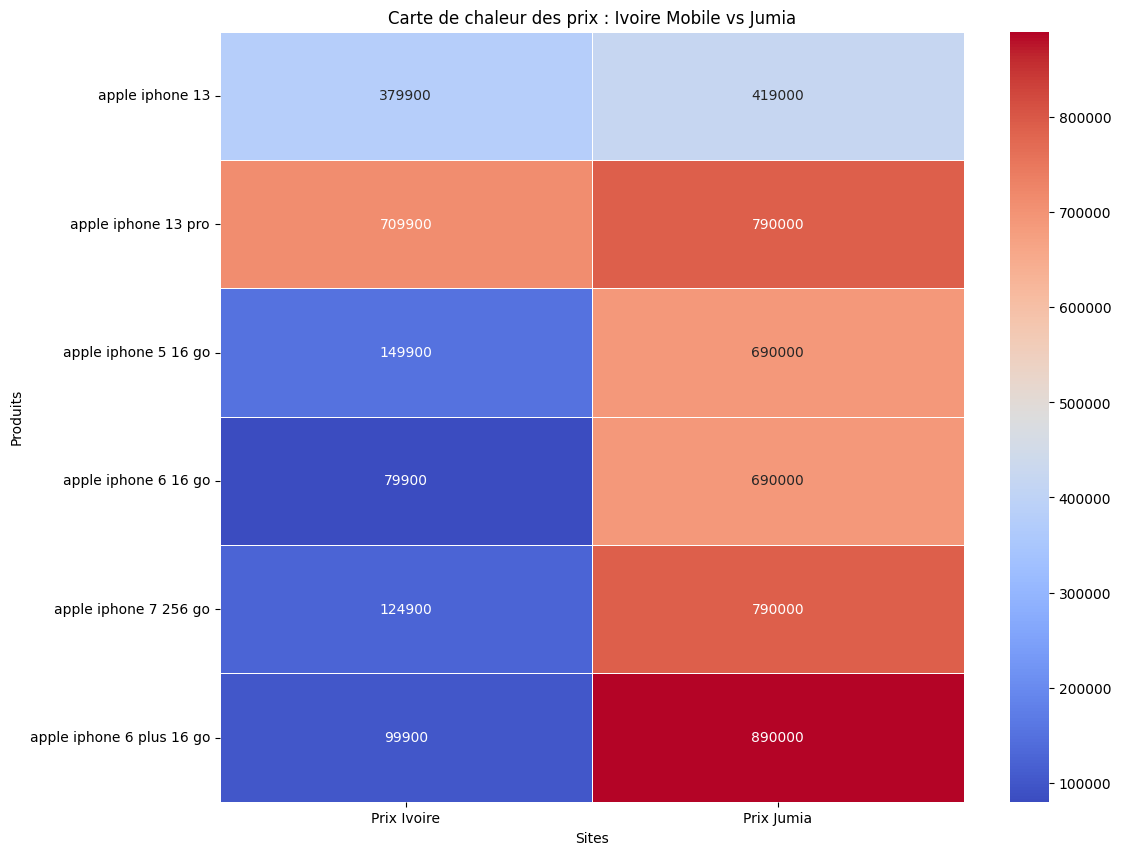

In [175]:
# Vérifiez la structure des données
print(comparison_sorted.head())

# Créer une matrice pour la heatmap
heatmap_data = comparison_sorted[["Nom Ivoire", "Prix Ivoire", "Prix Jumia"]].set_index("Nom Ivoire")

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Carte de chaleur des prix : Ivoire Mobile vs Jumia")
plt.ylabel("Produits")
plt.xlabel("Sites")
plt.show()
